# Data Visualization
---

This script takes 'cleaned' data as an input. Before perform regression on the data, we explore various features and their relation to target, rent price.

## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# set style sheet
plt.style.use("ggplot")
sns.set_style("white")

In [4]:
# import cleaned dataset
df = pd.read_csv("data/ny_rental_data_cleaned.r1.csv", index_col=0)

## Number of bedrooms

First, let's see what the most common number of bedrooms are. We make countplot using Seaborn. The plot shows that 1 bedroom is the most common type in Manhattan and Bronx, and other boroughs tend to have more bedrooms.

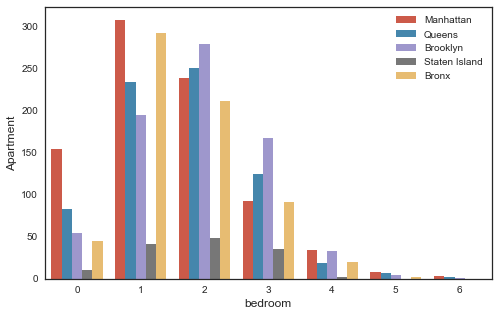

In [5]:
# set subplots
fig, ax = plt.subplots(1,1,figsize=(8, 5))

# plot bedroom counts
sns.countplot("bedrooms", data=df, ax=ax, hue="borough")

# customize plots
ax.set_xlabel("bedroom")
ax.set_ylabel("Apartment")
plt.legend(loc=1)

## Boroughs

Next, we count number of apartment listings in each borough. Countplot is made using Seaborn, and the plot shows that we have ~700 apartment listings in all boroughs except Staten Island in which only ~100 apartment listings are available.

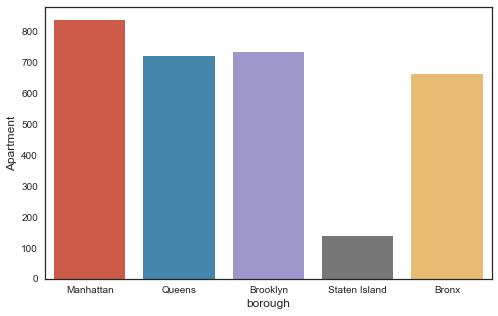

In [6]:
# set subplots
fig, ax = plt.subplots(1,1,figsize=(8, 5))

# plot bedroom counts
sns.countplot("borough", data=df, ax=ax)

# customize plots
ax.set_ylabel("Apartment")

## Relationship between rent and bedrooms

The relationship between rent and number of bedrooms is plotted using Seaborn barplot. The plot is separated into boroughs. The plot shows that rent is higher for more number of bedrooms as expected. However, the rent difference between 3 to 5 bedrooms is not very large. The plot also shows that we have limited statistics for 6 bedroom apartments.

(0, 15000)

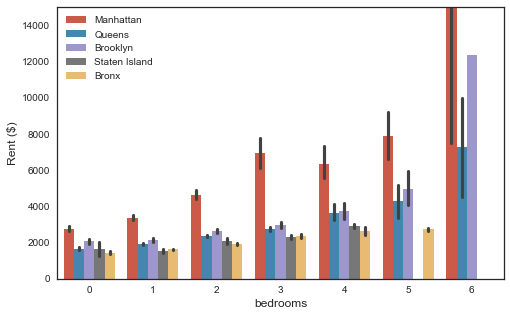

In [7]:
# set subplots
fig, ax = plt.subplots(1,1,figsize=(8,5))

# create bar plot
sns.barplot(x="bedrooms",y="rent", data=df, ax=ax, hue="borough")

# customize plots
ax.legend()
ax.set_ylabel("Rent ($)")
ax.set_ylim([0,15000])

## Relationship between rent and apartment rating

The relationship between rent and apartment rating is plotted using barplot. The plot is separated into boroughs. The plot shows that the average rent is slightly higher for the apartments with higher rating, though the difference isn't very large.

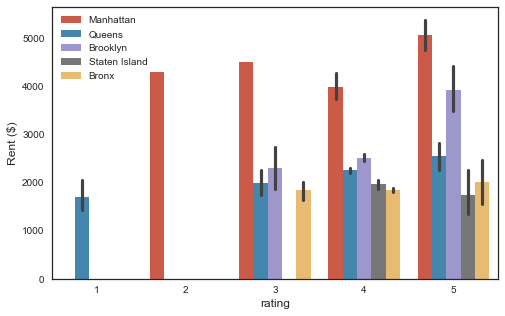

In [8]:
# set subplots
fig, ax = plt.subplots(1,1,figsize=(8,5))

# create bar plot
sns.barplot(x="rating",y="rent", data=df, ax=ax, hue="borough")

# customize plots
ax.legend()
ax.set_ylabel("Rent ($)")
plt.legend(loc=2)

## Pet policy

Next, the average rent is compared between different pet policy. The bar plot shows that there is a significant difference between rent dependig on dog/cat policy.

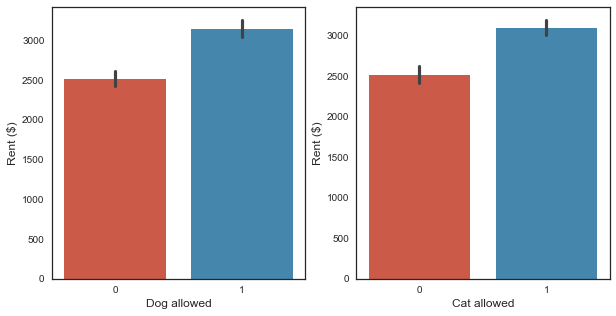

In [9]:
# set subplots
fig, ax = plt.subplots(1,2,figsize=(10,5))

# create bar plot
sns.barplot(x="pet_dog",y="rent", data=df, ax=ax[0])
sns.barplot(x="pet_cat",y="rent", data=df, ax=ax[1])

# customize plots
for a in ax:
    a.set_ylabel("Rent ($)")
    
ax[0].set_xlabel("Dog allowed")
ax[1].set_xlabel("Cat allowed")

## Amenities

In the data frame, amenities are stored as dummy variables. The average rent is compared between apartments with and without an amenity. Only selected amenities are plotted here. They are:
- Washer/dryer in unit
- Business center
- Fitness center
- Furnished
- Gated
- Pet care service
- Yoga studio
- Package service
- Concierge

The plots shows that some amenities such as washer/dryer in unit, business center, or fitness center have large impact on the rent. However, there are amenties that do not have significant influence on rent, such as 'gated'.

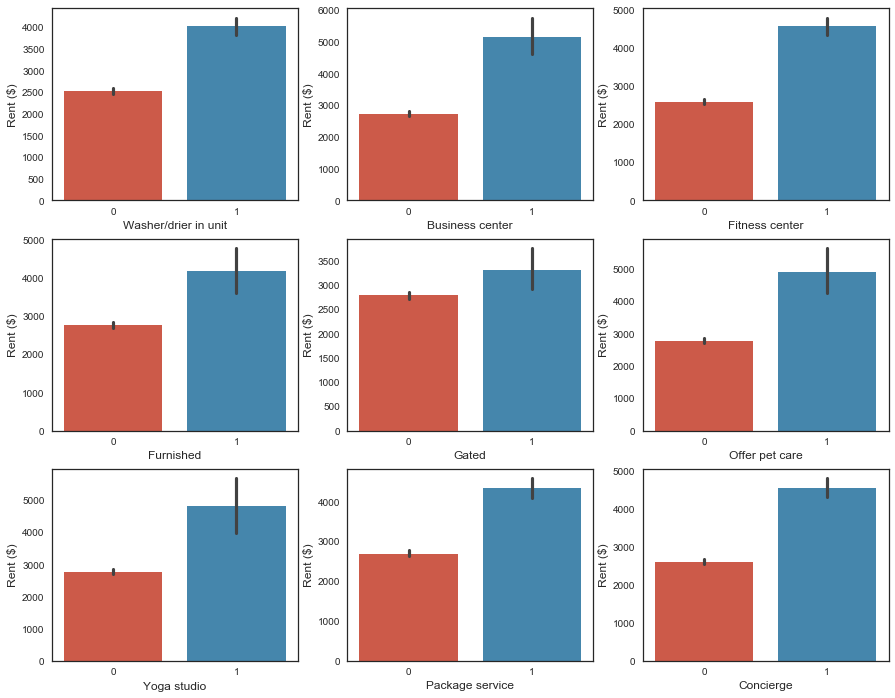

In [10]:
# set subplots
fig, ax = plt.subplots(3,3,figsize=(15,12))

# create bar plot
#sns.barplot(x=["amenity_washer/dryer","amenity_business"],y="rent", data=df, ax=ax[0,0])
sns.barplot(x="amenity_washer/dryer",y="rent", data=df, ax=ax[0,0])
sns.barplot(x="amenity_business",y="rent", data=df, ax=ax[0,1])
sns.barplot(x="amenity_fitness",y="rent", data=df, ax=ax[0,2])
sns.barplot(x="amenity_furnished",y="rent", data=df, ax=ax[1,0])
sns.barplot(x="amenity_gated",y="rent", data=df, ax=ax[1,1])
sns.barplot(x="amenity_pet care",y="rent", data=df, ax=ax[1,2])
sns.barplot(x="amenity_yoga studio",y="rent", data=df, ax=ax[2,0])
sns.barplot(x="amenity_package",y="rent", data=df, ax=ax[2,1])
sns.barplot(x="amenity_concierge",y="rent", data=df, ax=ax[2,2])

# customize plots
for a in ax.reshape(-1):
    a.set_ylabel("Rent ($)")
    
ax[0,0].set_xlabel("Washer/drier in unit")
ax[0,1].set_xlabel("Business center")
ax[0,2].set_xlabel("Fitness center")
ax[1,0].set_xlabel("Furnished")
ax[1,1].set_xlabel("Gated")
ax[1,2].set_xlabel("Offer pet care")
ax[2,0].set_xlabel("Yoga studio")
ax[2,1].set_xlabel("Package service")
ax[2,2].set_xlabel("Concierge")

## Relationship between rent and apartment size (sqft)

The relationship between rent and apartment size is plotted using regplot. The plots are separated into 5 boroughs. The plots show that there is a positive correlation between rent and apartment size (sqft) as expected. This tendency is the strongest in Manhattan, followed by Brooklyn and Queens. In Bronx and Staten Island, apartment size does not have large impact on rent rate.

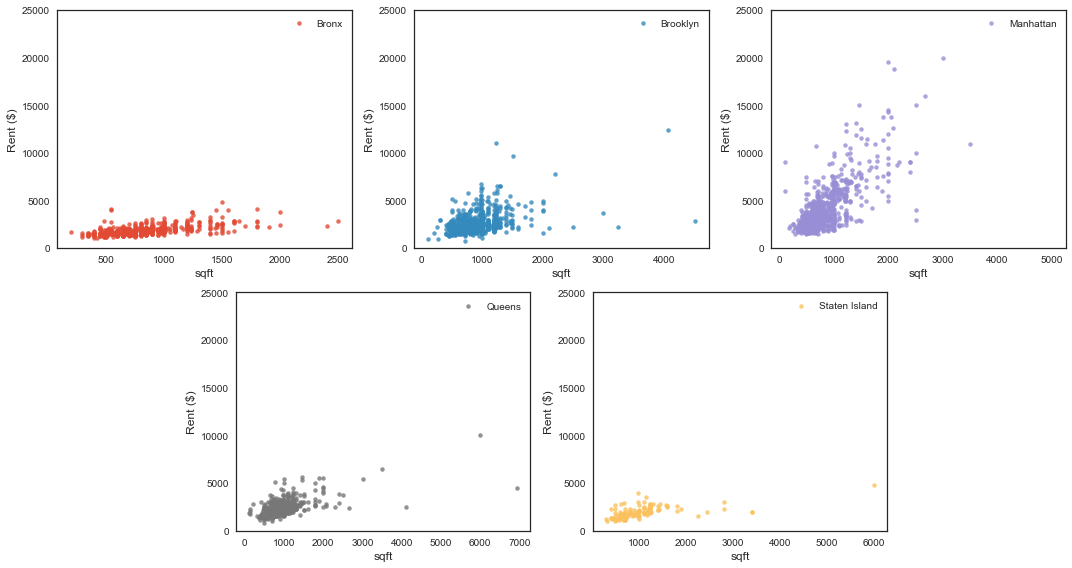

In [11]:
# set subplots
fig, ax = plt.subplots(5,1,figsize=(15,8))

ax[0] = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax[1] = plt.subplot2grid((2,6), (0,2), colspan=2)
ax[2] = plt.subplot2grid((2,6), (0,4), colspan=2)
ax[3] = plt.subplot2grid((2,6), (1,1), colspan=2)
ax[4] = plt.subplot2grid((2,6), (1,3), colspan=2)

ax_count = 0
# create regression plot (scatter)
for borough, df_borough in df.groupby("borough"):
    sns.regplot("sqft", "rent", df_borough, fit_reg=False,
                label=borough, scatter_kws={'alpha':0.8, 's':20}, ax=ax[ax_count])
    ax_count = ax_count+1

# customize plots
for a in ax.reshape(-1):
    a.set_ylabel("Rent ($)")
    a.set_ylim([0,25000])
    a.legend()
    
# use tight layout
plt.tight_layout()

## Relationship between rent and built year

The relationship between apartment built year and rent is plotted. Apartments with missing built year are filled with median built year of all apartments. 

It shows that apartments built later have higher rent, but the correlation is not very strong. Also large number of apartments with missing built year may make the prediction more difficult. 

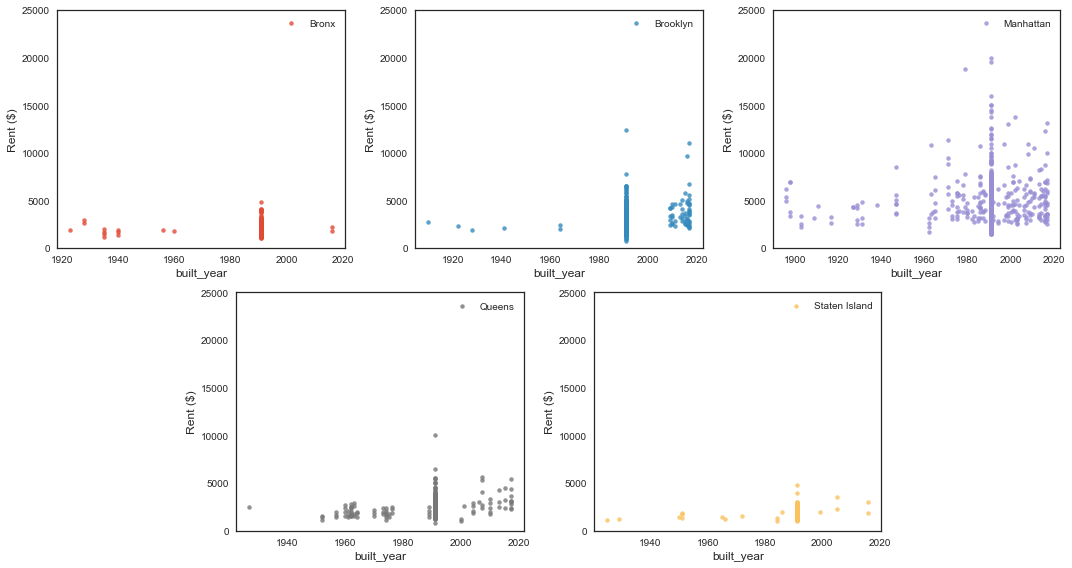

In [12]:
# set subplots
fig, ax = plt.subplots(5,1,figsize=(15,8))

ax[0] = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax[1] = plt.subplot2grid((2,6), (0,2), colspan=2)
ax[2] = plt.subplot2grid((2,6), (0,4), colspan=2)
ax[3] = plt.subplot2grid((2,6), (1,1), colspan=2)
ax[4] = plt.subplot2grid((2,6), (1,3), colspan=2)

ax_count = 0
# create regression plot (scatter)
for borough, df_borough in df.groupby("borough"):
    sns.regplot("built_year", "rent", df_borough, fit_reg=False,
                label=borough, scatter_kws={'alpha':0.8, 's':20}, ax=ax[ax_count])
    ax_count = ax_count+1

# customize plots
for a in ax.reshape(-1):
    a.set_ylabel("Rent ($)")
    a.set_ylim([0,25000])
    a.legend()
    
# use tight layout
plt.tight_layout()

## Relationship between rent and property size

The relationship between rent and property size, number of units in apartment complex, is plotted. Apartments with missing property size are filled with median property size of all apartments (~800).

The plots show that there is a weak correlation between rent and property size, suggesting that we might need to remove property size as a feature.

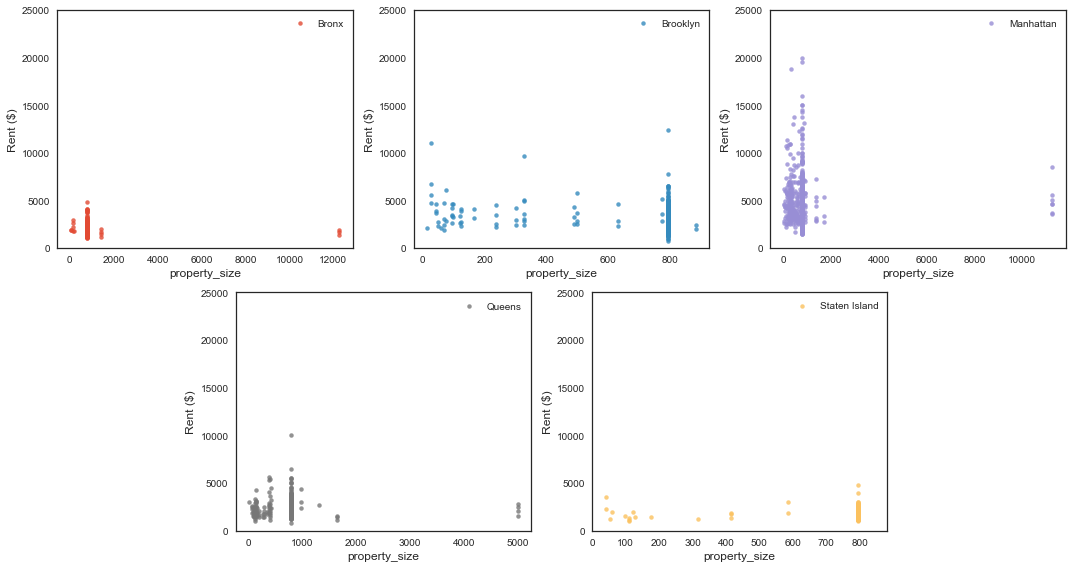

In [13]:
# set subplots
fig, ax = plt.subplots(5,1,figsize=(15,8))

ax[0] = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax[1] = plt.subplot2grid((2,6), (0,2), colspan=2)
ax[2] = plt.subplot2grid((2,6), (0,4), colspan=2)
ax[3] = plt.subplot2grid((2,6), (1,1), colspan=2)
ax[4] = plt.subplot2grid((2,6), (1,3), colspan=2)

ax_count = 0
# create regression plot (scatter)
for borough, df_borough in df.groupby("borough"):
    sns.regplot("property_size", "rent", df_borough, fit_reg=False,
                label=borough, scatter_kws={'alpha':0.8, 's':20}, ax=ax[ax_count])
    ax_count = ax_count+1

# customize plots
for a in ax.reshape(-1):
    a.set_ylabel("Rent ($)")
    a.set_ylim([0,25000])
    a.legend()
    
# use tight layout
plt.tight_layout()

## Location

Longitude and latitude are obtained from addresses using geocoder, and locations of apartments are plotted. The plot clearly shows the separation between boroughs and the rental listing density in each region. 

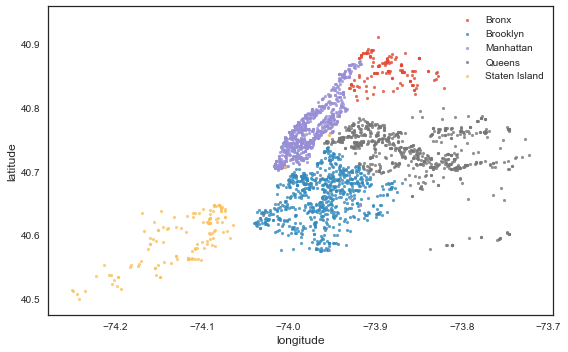

In [14]:
# set subplots
fig, ax = plt.subplots(1,1,figsize=(8,5))

# create regression plot (scatter)
for borough, df_borough in df.groupby("borough"):
    sns.regplot("longitude", "latitude", df_borough, fit_reg=False, scatter_kws={'s':10}, ax=ax, label=borough)

# customize plots
ax.legend()
plt.tight_layout()

## Heat map

In addition to the simple scatter plot of longitudes and latitudes, the apartment listing is plotted as a heat map overlaid with google map. The heat map shows that Manhattan and its nearby regions are the most populated as expected.

In [15]:
# import gmaps to make scatter plot on google maps
import gmaps, os
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [16]:
# data frame with coordinates only for easy plotting
df_loc = df[["latitude","longitude"]]
df_loc = df_loc.dropna()

# create heat layer
layer = gmaps.heatmap_layer(df_loc, max_intensity=5, point_radius=8)

# draw google map and the heat layer
fig = gmaps.figure()
fig.add_layer(layer)
fig

Figure()

![gmap_layover](../figure/gmap_heatmap.png)

## Location with Google map overlaid

For last, locations of apartment listings are plotted on Google map. 

In [17]:
fig = gmaps.figure()

# define colors for each borough
colors = [
          "rgba(200,112,126,0.7)", # red
          "rgba(76,146,177,0.7)", # blue
          "rgba(172,153,193,0.7)", # purple
          "rgba(200,194,189,0.7)", # gray
          "rgba(255,206,0,0.7)", # orange
          ]

# loop over each boroguh by groupby
color_index = 0
for borough, df_borough in df.groupby("borough"):
    
    # remove rows with empty longitude and latitude. This should not happen when data cleaning is properly performed
    df_borough = df_borough.dropna(subset=[["longitude","latitude"]])
    
    # only select latitude and logitude columns for easy plotting
    df_borough = df_borough[["latitude","longitude"]]
  
    # set color to current index
    color = colors[color_index]
    color_index = color_index+1

    # create symbol layer, representing apartment listings from each borough
    symbol_layer = gmaps.symbol_layer(df_borough,
                                      fill_color=color,
                                      stroke_color=color,
                                      scale=2)
    # add symbol_lyaer to figure
    fig.add_layer(symbol_layer)

fig

Figure()

![gmap_layover](../figure/gmap_layover.png)

## Correlation of continuous features

When building predictoin model of rent price, performance of various machine learning methods are compared. One of the methods compared is linear regression. Here, correlations of continuous variables are plotted so that we can avoid linearly dependent features.

In [18]:
df_lin = df[["bathrooms","bedrooms","leaseLength","rating","sqft","built_year","property_size","longitude","latitude"]]

In [19]:
# TEMPORARY FIX: drop rows without longitude and latitude
df_lin = df_lin.dropna(subset=["longitude","latitude"])

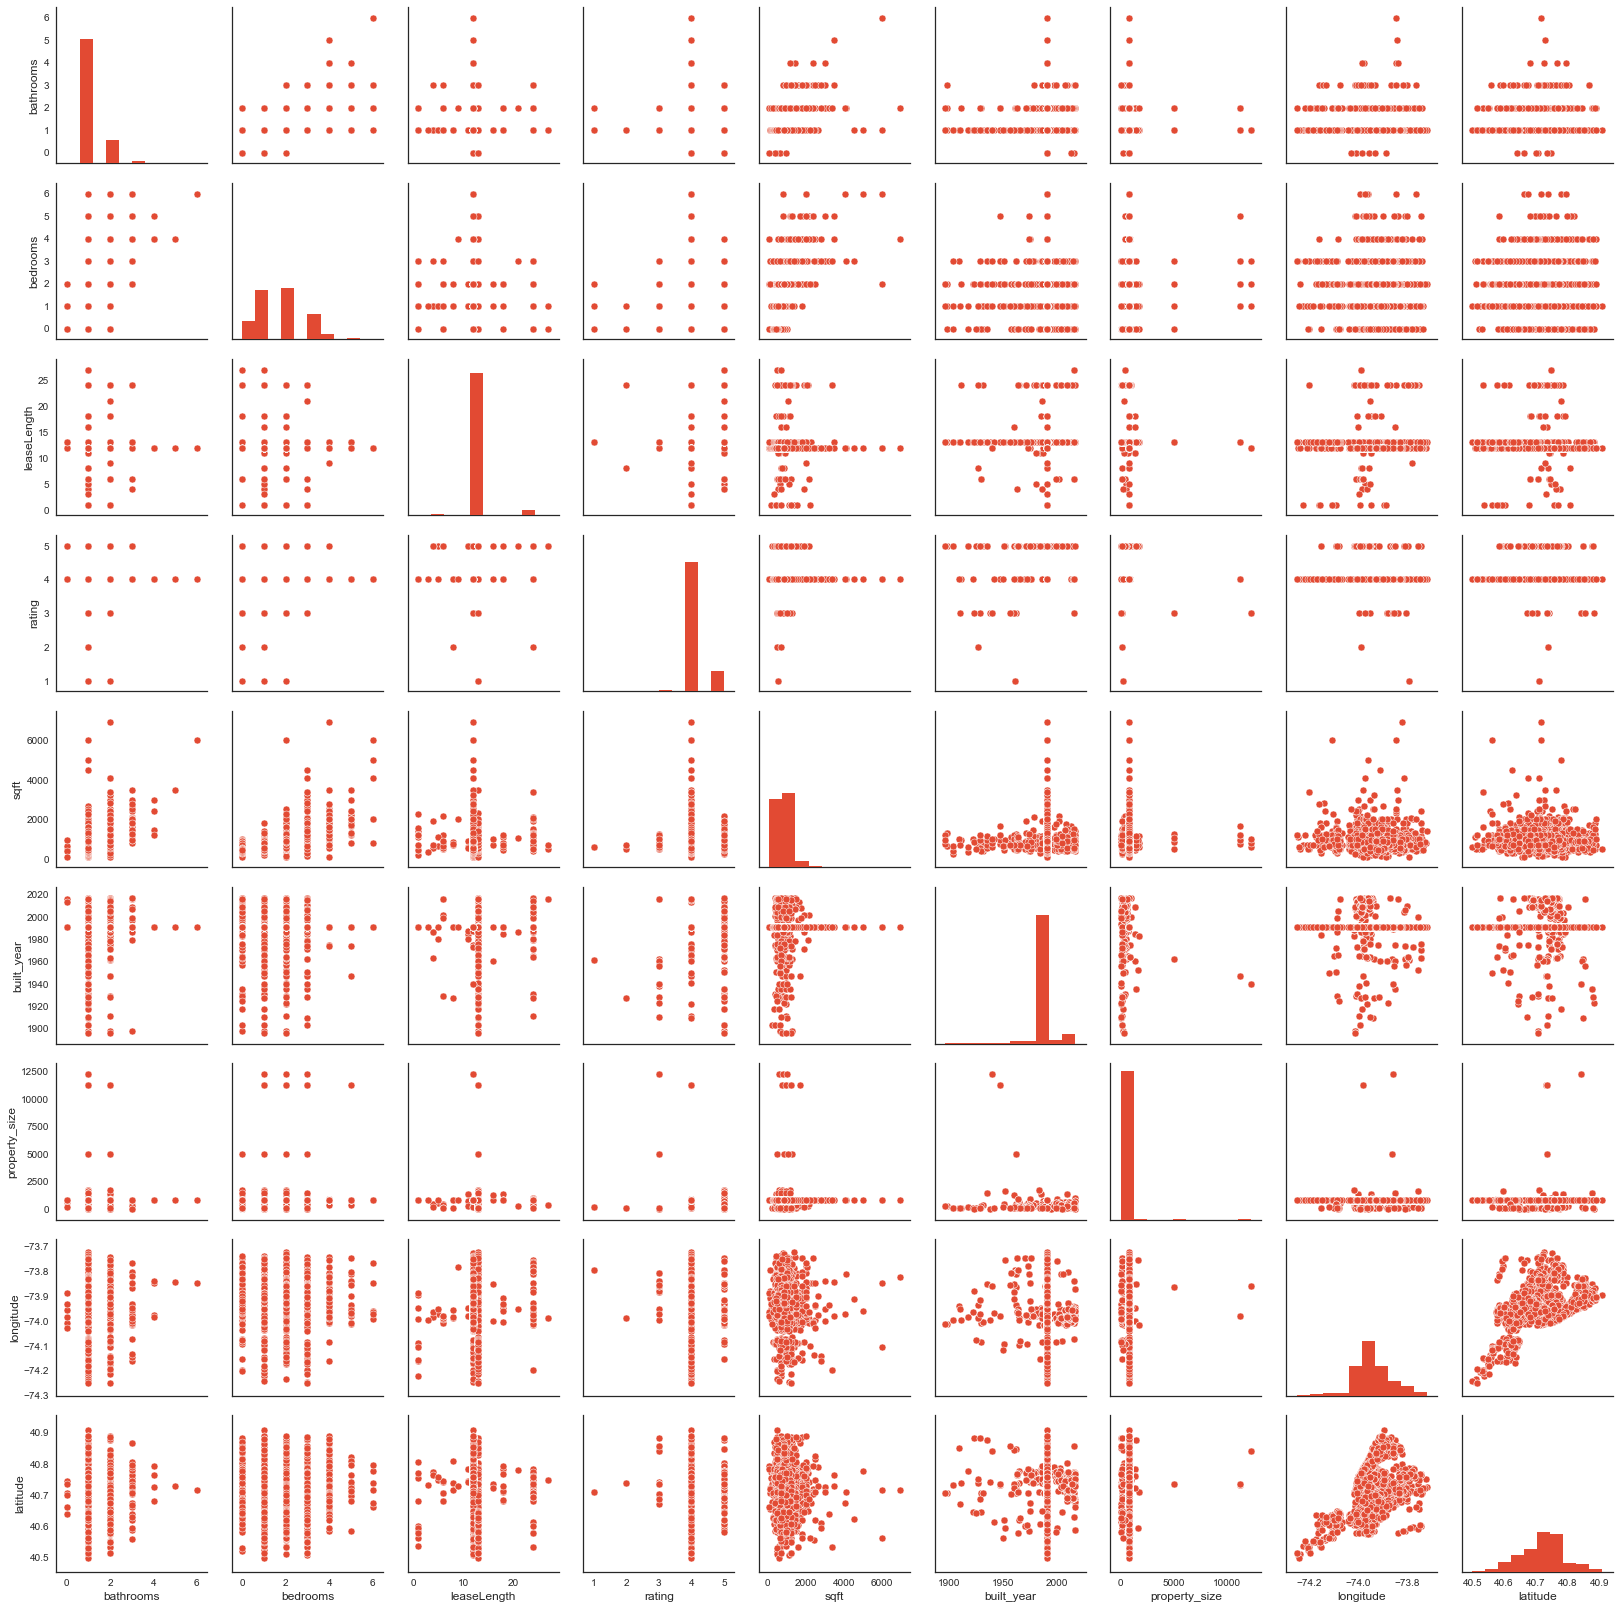

In [20]:
# make a pairplot
sns.pairplot(df_lin)